## Making a model to predict energy consumption for a range of buildings.



Importing the basic modules

In [1]:
import os
import gc
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import datetime

In [3]:
df_train = pd.read_csv('Dataset/building_energy_consumption.csv')

Random sampling the data to lower the computational workload.

In [4]:
df_train.sample(200000)

,Unnamed: 0,meter,site_id,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,wind_speed,meter_reading,...,primary_use_6,primary_use_7,primary_use_8,primary_use_9,primary_use_10,primary_use_11,primary_use_12,primary_use_13,primary_use_14,primary_use_15
537232,919006,0,5,52302,2,5.0,2.769231,4.0,6.7,0.000077,...,1,0,0,0,0,0,0,0,0,0
756445,1293738,0,13,233341,-1,-2.2,8.000000,-3.9,1.5,0.000024,...,0,0,0,0,0,0,0,0,0,0
274334,468863,0,13,23903,-1,-20.0,0.000000,-25.0,7.2,0.000178,...,0,1,0,0,0,0,0,0,0,0
351213,601258,0,13,79782,-1,-19.4,0.000000,-24.4,5.7,0.000057,...,1,0,0,0,0,0,0,0,0,0
362300,620195,0,4,304333,12,13.3,3.130435,8.9,3.1,0.000024,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653433,1117753,0,14,97838,-1,-7.2,0.000000,-13.3,4.1,0.000063,...,0,0,0,0,0,0,0,0,0,0
912892,1561068,0,4,4000,4,13.9,4.000000,5.6,6.7,0.000059,...,0,0,0,0,0,0,0,0,0,0
398039,681429,0,3,180000,-1,-2.2,6.666666,-13.9,2.6,0.000025,...,0,0,0,0,0,0,0,0,0,0
57524,98048,0,13,87131,-1,-3.3,0.000000,-8.3,7.2,0.000056,...,1,0,0,0,0,0,0,0,0,0


In [5]:
df_targets = df_train['meter_reading']

In [6]:
# convert energy consumption per square feet to total energy consumption
df_train['meter_reading'] = df_train['meter_reading'] * df_train['square_feet']

In [7]:
df_train.drop(['meter_reading'], axis = 1)

,Unnamed: 0,meter,site_id,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,wind_speed,sine_hour,...,primary_use_6,primary_use_7,primary_use_8,primary_use_9,primary_use_10,primary_use_11,primary_use_12,primary_use_13,primary_use_14,primary_use_15
0,0,0,1,50623,5,3.8,0.0,2.4,3.1,-1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,5374,4,3.8,0.0,2.4,3.1,-1.0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,97532,10,3.8,0.0,2.4,3.1,-1.0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,81580,5,3.8,0.0,2.4,3.1,-1.0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,1,56995,6,3.8,0.0,2.4,3.1,-1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1792689,0,14,171084,-1,12.2,9.0,11.1,2.6,-1.0,...,0,0,0,0,0,0,0,0,0,0
1048571,1792693,0,14,25401,-1,12.2,9.0,11.1,2.6,-1.0,...,0,0,0,0,0,0,0,0,0,0
1048572,1792696,0,14,25609,-1,12.2,9.0,11.1,2.6,-1.0,...,0,0,0,0,0,0,0,0,0,0
1048573,1792698,0,14,62242,-1,12.2,9.0,11.1,2.6,-1.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train,df_targets, test_size=0.2)

In [9]:
df_train.head()

,Unnamed: 0,meter,site_id,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,wind_speed,meter_reading,...,primary_use_6,primary_use_7,primary_use_8,primary_use_9,primary_use_10,primary_use_11,primary_use_12,primary_use_13,primary_use_14,primary_use_15
0,0,0,1,50623,5,3.8,0.0,2.4,3.1,3.189249,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,5374,4,3.8,0.0,2.4,3.1,0.318141,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,97532,10,3.8,0.0,2.4,3.1,5.169196,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,81580,5,3.8,0.0,2.4,3.1,4.527690,...,0,0,0,0,0,0,0,0,0,0
4,5,0,1,56995,6,3.8,0.0,2.4,3.1,4.405714,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_train_1 = pd.DataFrame()

In [39]:
df_train_1.head()

,square_feet
0,0.057471
1,0.005737
2,0.111103
3,0.092865
4,0.064757


In [38]:
df_train_1 ['square_feet']= df_train['square_feet']

In [40]:
df_train_1 ['floor_count']= df_train['floor_count']

In [41]:
df_train_1 ['sine_hour']= df_train['sine_hour']

In [42]:
df_train_1 ['sine_month']= df_train['sine_month']

In [43]:
df_train_1.head()

,square_feet,floor_count,sine_hour,sine_month
0,0.057471,0.222222,-1.0,-0.866025
1,0.005737,0.185185,-1.0,-0.866025
2,0.111103,0.407407,-1.0,-0.866025
3,0.092865,0.222222,-1.0,-0.866025
4,0.064757,0.259259,-1.0,-0.866025


In [44]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[['square_feet', 'floor_count']] = scaler.fit_transform(df_train[['square_feet','floor_count']])


In [45]:
df_train.head()

,Unnamed: 0,meter,site_id,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,wind_speed,meter_reading,...,primary_use_6,primary_use_7,primary_use_8,primary_use_9,primary_use_10,primary_use_11,primary_use_12,primary_use_13,primary_use_14,primary_use_15
0,0,0,1,0.057471,0.222222,3.8,0.0,2.4,3.1,3.189249,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0.005737,0.185185,3.8,0.0,2.4,3.1,0.318141,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0.111103,0.407407,3.8,0.0,2.4,3.1,5.169196,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,0.092865,0.222222,3.8,0.0,2.4,3.1,4.527690,...,0,0,0,0,0,0,0,0,0,0
4,5,0,1,0.064757,0.259259,3.8,0.0,2.4,3.1,4.405714,...,0,0,0,0,0,0,0,0,0,0


## Spliting of the data and machine learning models

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_1,df_targets, test_size=0.2)

In [48]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
y_train=y_train.astype('int')

## Neural network

In [71]:
regr = MLPRegressor(solver='lbfgs', activation='relu', learning_rate='adaptive', verbose=True,
                    hidden_layer_sizes=(24, 12), 
                    random_state=1, max_iter=1500).fit(X_train, y_train)


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          433     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.97571D+00    |proj g|=  3.91038D+00

At iterate    1    f=  4.50284D+00    |proj g|=  2.55022D+00

At iterate    2    f=  1.33321D+00    |proj g|=  5.36958D-01

At iterate    3    f=  1.27477D+00    |proj g|=  1.41839D-01

At iterate    4    f=  1.25865D+00    |proj g|=  1.16275D-01

At iterate    5    f=  1.19495D+00    |proj g|=  1.04980D-01

At iterate    6    f=  1.16250D+00    |proj g|=  7.12137D-02

At iterate    7    f=  8.58263D-01    |proj g|=  1.50897D-01

At iterate    8    f=  8.43470D-01    |proj g|=  2.14378D-01

At iterate    9    f=  8.36444D-01    |proj g|=  4.20655D-02

At iterate   10    f=  8.36052D-01    |proj g|=  1.45699D-02

At iterate   11    f=  8.35363D-01    |proj g|=  2.83151D-02

At iterate   12    f=  8.33685D-01    |proj g|=  7.64515D-02

At iterate   13    f=  8.3

/Users/preetish/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [72]:
nn_y_pred_1 = regr.predict(X_test)

In [73]:
r_sq = regr.score(X_test, y_test)


In [75]:
r_sq

0.4641890704844177

Visualisation of the neural network prediction. Re-run to see the full image size.

In [54]:
import scipy as sp
import matplotlib.pyplot as plt

Text(25, 2, 'R^2 = 0.4643')

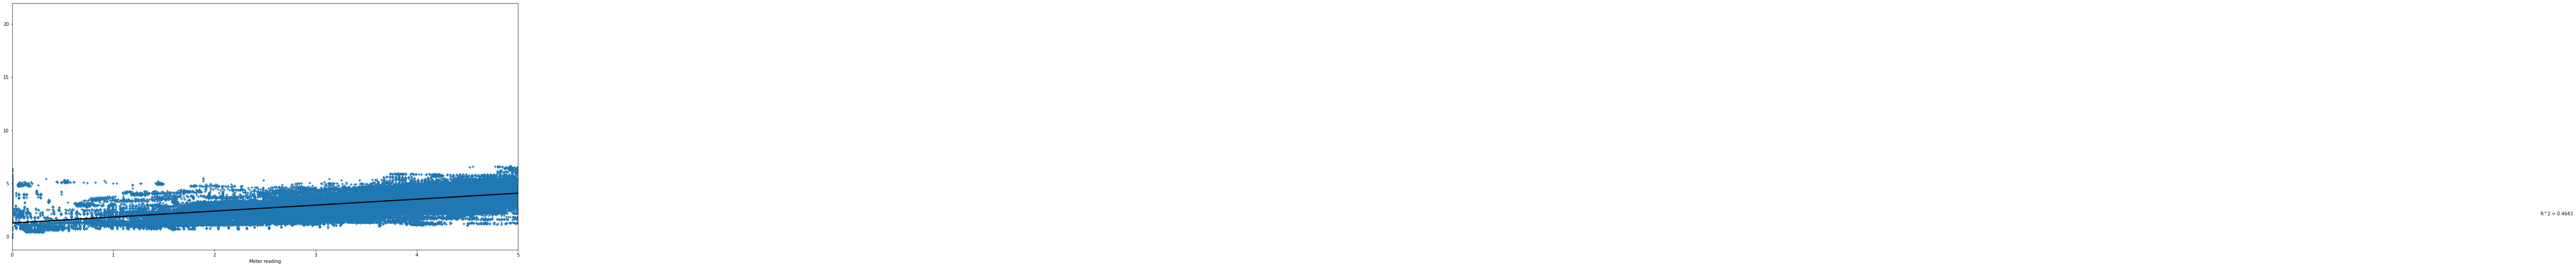

In [55]:
r_sq = regr.score(X_test, y_test)

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(y_test, nn_y_pred_1, marker='+')

b, a = np.polyfit(y_test, nn_y_pred_1, 1)
xseq = np.linspace(0, 35, 100)
plt.xlabel("Meter reading")
plt.xlim([0, 5])
ax.plot(xseq, a + b*xseq, color='k', lw=2.5)
ax.text(1, 2, 'R^2 = {0:.4g}'.format(float(r_sq)))

Helper function to check models.

In [56]:
from sklearn.metrics import r2_score

def checkModelPerformane(model):
    X=X_train
    y=y_train

    model.fit(X,y)
    
    pred=model.predict(X_test)
    print("r2 value : ", r2_score(y_test, pred))
    print("mean_squared_error: ",np.sqrt(mean_squared_error(y_test, pred))) 
    print("mean_absolute_error: ", np.sqrt(mean_absolute_error(y_test, pred)))

Importing modules for the models

In [57]:
from sklearn.linear_model import LinearRegression,SGDRegressor,ElasticNet,Ridge
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


In [58]:

print("LinearRegression")
checkModelPerformane(LinearRegression())


LinearRegression
r2 value :  0.2332944526792089
mean_squared_error:  1.3752272887974926
mean_absolute_error:  1.0490126597642044


In [59]:
print("ElasticNet regression ")
checkModelPerformane(ElasticNet())

ElasticNet regression 
r2 value :  -0.0962222534180075
mean_squared_error:  1.6444076397150362
mean_absolute_error:  1.153414184203338


In [60]:
print("Decision tree regression")
checkModelPerformane(DecisionTreeRegressor(random_state=42))

Decision tree regression
r2 value :  0.7903274200959256
mean_squared_error:  0.7191690654521954
mean_absolute_error:  0.7574234724864368


In [61]:
print("Ridge regression ")
checkModelPerformane(Ridge(alpha=1.0))

Ridge regression 
r2 value :  0.2332947314380317
mean_squared_error:  1.375227038794883
mean_absolute_error:  1.049014236831405


In [62]:
print("Random forest regression")
checkModelPerformane(RandomForestRegressor(max_depth=15, random_state=1))

Random forest regression
r2 value :  0.7447594147290724
mean_squared_error:  0.7934782825965142
mean_absolute_error:  0.7890191654352015


## OVERALL ANALYSIS

The best model is a decision tree regression. Hooray! Now let's visualize it!

In [66]:
X=X_train
y=y_train

xp = DecisionTreeRegressor(random_state=42).fit(X,y)    
pred=xp.predict(X_test)
print("r2 value : ", r2_score(y_test, pred))
print("mean_squared_error: ",np.sqrt(mean_squared_error(y_test, pred))) 
print("mean_absolute_error: ", np.sqrt(mean_absolute_error(y_test, pred)))

r2 value :  0.7903274200959256
mean_squared_error:  0.7191690654521954
mean_absolute_error:  0.7574234724864368


Text(25, 2, 'R^2 = 0.7903')

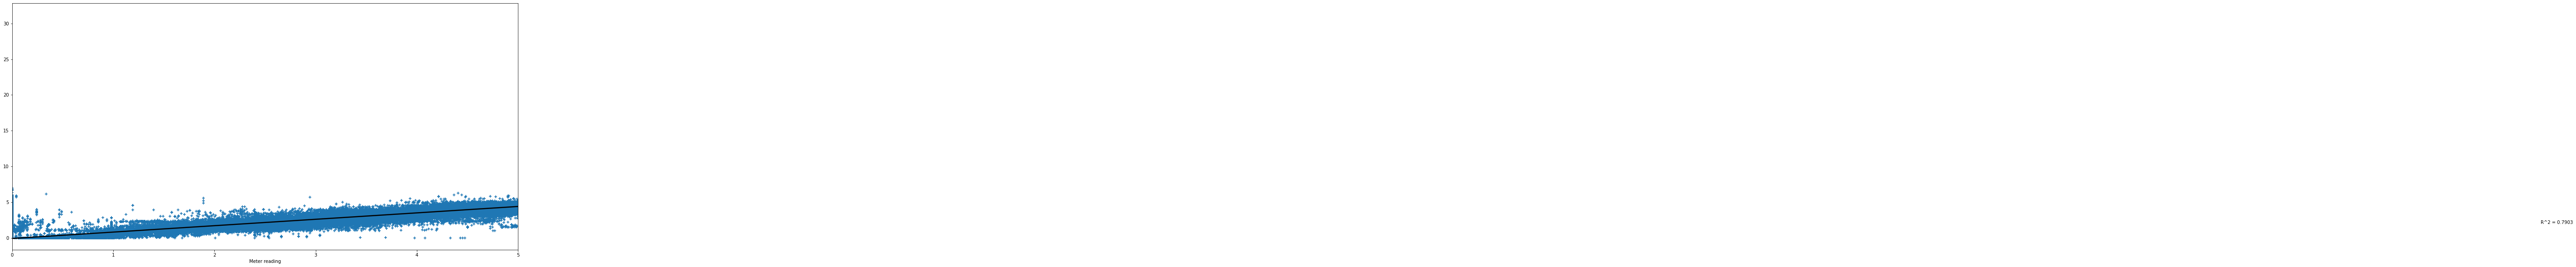

In [70]:
r_sq = r2_score(y_test, pred)

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(y_test, pred, marker='+')

b, a = np.polyfit(y_test, pred, 1)
xseq = np.linspace(0, 35, 100)
plt.xlabel("Meter reading")
plt.xlim([0, 5])
ax.plot(xseq, a + b*xseq, color='k', lw=2.5)
ax.text(25, 2, 'R^2 = {0:.4g}'.format(float(r_sq)))

## Conclusion : 

Machine Learning can be used for Processing, and for predicting power consumption in any specific area. With our model, we can predict the amount of energy needed allowing us to balance the energy production between renewable sources and traditional sources of energy (Nuclear and fossil fuels).   

